## Análisis árbol de decisión

In [13]:
import pickle

# Cargar las variables
with open("../Entrega_3/variablesAD.pkl", "rb") as f:
    loaded_data = pickle.load(f)

dataAD = loaded_data["data"]
modelAD = loaded_data["model"]

modelAD

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

## Análisis Random Forest

In [14]:
import pickle

# Cargar las variables
with open("../Entrega_3/variablesRF.pkl", "rb") as f:
    loaded_data = pickle.load(f)

dataRF = loaded_data["data"]
modelRF = loaded_data["model"]

modelRF

RandomForestClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=1000, n_jobs=-1, random_state=42)

## Análisis Naive Bayes

In [15]:
import pickle

# Cargar las variables
with open("../Entrega_3/variablesNB.pkl", "rb") as f:
    loaded_data = pickle.load(f)

data = loaded_data["data"]
modelNB = loaded_data["model"]

modelNB

GaussianNB(var_smoothing=1e-05)

## Comparación

In [16]:
import time
# data = [X_test, X_train, y_test, y_train]

start = time.time()
modelNB.fit(data[1], data[3])
tiempo_entrenamiento_nb = time.time() - start

start = time.time()
modelAD.fit(data[1], data[3])
tiempo_entrenamiento_dt = time.time() - start

start = time.time()
modelRF.fit(data[1], data[3])
tiempo_entrenamiento_rf = time.time() - start

print("Tiempo de entrenamiento (Naive Bayes):", tiempo_entrenamiento_nb)
print("Tiempo de entrenamiento (Árbol de Decisión):", tiempo_entrenamiento_dt)
print("Tiempo de entrenamiento (Random Forest):", tiempo_entrenamiento_rf)

Tiempo de entrenamiento (Naive Bayes): 0.018915891647338867
Tiempo de entrenamiento (Árbol de Decisión): 0.0017578601837158203
Tiempo de entrenamiento (Random Forest): 2.592677354812622


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_nb = modelNB.predict(data[0])
y_pred_dt = modelAD.predict(data[0])
y_pred_rf = modelRF.predict(data[0])

print("Accuracy Naive Bayes:", accuracy_score(data[2], y_pred_nb))
print("Accuracy Árbol de Decisión:", accuracy_score(data[2], y_pred_dt))
print("Accuracy Random Forest:", accuracy_score(data[2], y_pred_rf))


Accuracy Naive Bayes: 0.7648401826484018
Accuracy Árbol de Decisión: 0.7579908675799086
Accuracy Random Forest: 0.8105022831050228


In [18]:
print("Reporte de clasificación para Naive Bayes:\n", classification_report(data[2], y_pred_nb))
print("Reporte de clasificación para Árbol de Decisión:\n", classification_report(data[2], y_pred_dt))
print("Reporte de clasificación para Random Forest:\n", classification_report(data[2], y_pred_rf))

Reporte de clasificación para Naive Bayes:
               precision    recall  f1-score   support

        Cara       0.89      0.83      0.86       145
   Económica       0.73      0.84      0.78       146
  Intermedia       0.68      0.63      0.65       147

    accuracy                           0.76       438
   macro avg       0.77      0.77      0.76       438
weighted avg       0.77      0.76      0.76       438

Reporte de clasificación para Árbol de Decisión:
               precision    recall  f1-score   support

        Cara       0.81      0.91      0.86       145
   Económica       0.79      0.73      0.76       146
  Intermedia       0.66      0.63      0.65       147

    accuracy                           0.76       438
   macro avg       0.76      0.76      0.76       438
weighted avg       0.75      0.76      0.76       438

Reporte de clasificación para Random Forest:
               precision    recall  f1-score   support

        Cara       0.84      0.91      0.87

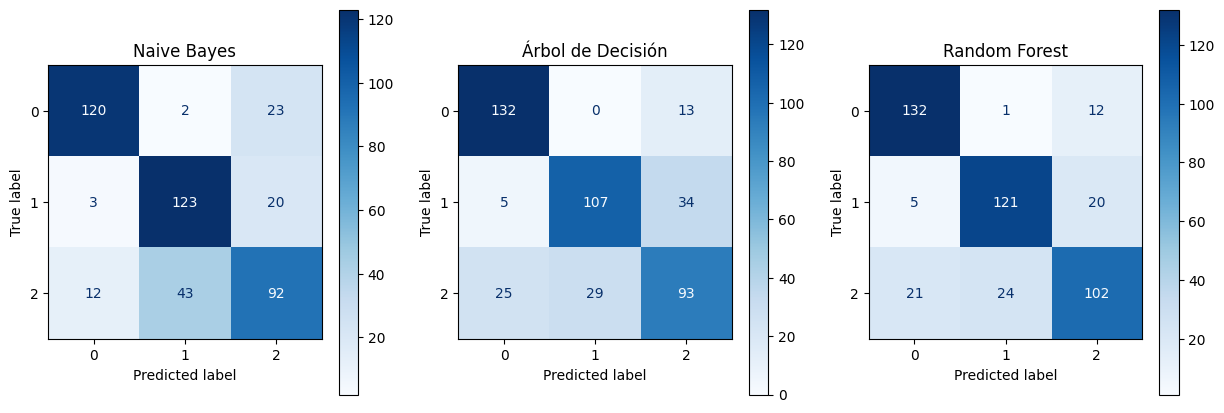

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Graficar matriz de confusión para cada modelo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, y_pred, title in zip(axes, [y_pred_nb, y_pred_dt, y_pred_rf], 
                             ["Naive Bayes", "Árbol de Decisión", "Random Forest"]):
    cm = confusion_matrix(data[2], y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap="Blues")
    ax.set_title(title)

plt.show()